# Backpropagation and Multilayer Neural Networks

### Goals: 
- Intro: train a neural network with high level framework `Keras`
- Diving deep: implement a real gradient descent in `Numpy`
- Auto-differentiation: the basics of `TensorFlow`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [28]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()

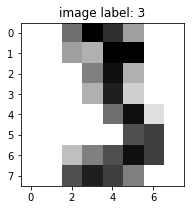

In [2]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- normalization
- train/test split

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

Let's display the one of the transformed sample (after feature standardization):

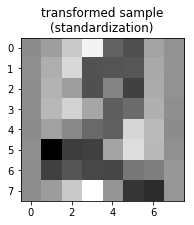

In [4]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

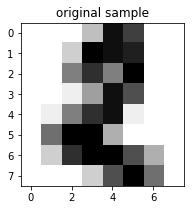

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1527, 64) (1527,)
(270, 64) (270,)


# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### a) Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [7]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [8]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

Using TensorFlow backend.


array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [78]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers, initializers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer="Adadelta",
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=50, batch_size=32)

/home/eisti/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
1527/1527 [==============================] - 0s 291us/step - loss: 1.1639 - acc: 0.7158
Epoch 2/50
1527/1527 [==============================] - 0s 82us/step - loss: 0.2887 - acc: 0.9430
Epoch 3/50
1527/1527 [==============================] - 0s 67us/step - loss: 0.1549 - acc: 0.9673
Epoch 4/50
1527/1527 [==============================] - 0s 103us/step - loss: 0.1009 - acc: 0.9790
Epoch 5/50
1527/1527 [==============================] - 0s 149us/step - loss: 0.0699 - acc: 0.9869
Epoch 6/50
1527/1527 [==============================] - 0s 132us/step - loss: 0.0529 - acc: 0.9908
Epoch 7/50
1527/1527 [==============================] - 0s 154us/step - loss: 0.0385 - acc: 0.9954
Epoch 8/50
1527/1527 [==============================] - 0s 93us/step - loss: 0.0285 - acc: 0.9967
Epoch 9/50
1527/1527 [==============================] - 0s 90us/step - loss: 0.0209 - acc: 0.9980
Epoch 10/50
1527/1527 [==============================] - 0s 80us/step - loss: 0.0158 - acc: 0.9987
Epoch 11/50
15

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
Note that the keras API documentation is avaiable at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

In [17]:
optimizers.SGD?

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

### c) Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

In [70]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

0.98148148148148151

- Compute the conditional probabilities of sample number 42 of the test set with `model.predict_proba(...)`
- Derive the loss (negative log likelihood of that sample) using numpy operations
- Compute the average negative log likelihood of the test set.
- Compare this value to the training loss reported by keras: is the model overfitting or underfitting?

Note: you might need to retrain the model with a larger number of epochs (e.g. 50) to ensure that it has fully converged.

In [74]:
y_pred_prob = model.predict_proba(X_test)

def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

EPSILON = 1e-8
def nll(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    return -np.mean(loglikelihoods)

nll(one_hot(10,y_test), y_pred_prob)

0.10258400687365986

##  impact of initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [85]:
N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05)))
model.add(Activation("tanh"))
model.add(Dense(H))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer="adam",
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

/home/eisti/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/15
1527/1527 [==============================] - 1s 376us/step - loss: 0.9794 - acc: 0.7531
Epoch 2/15
1527/1527 [==============================] - 0s 81us/step - loss: 0.2730 - acc: 0.9424
Epoch 3/15
1527/1527 [==============================] - 0s 83us/step - loss: 0.1618 - acc: 0.9738
Epoch 4/15
1527/1527 [==============================] - 0s 86us/step - loss: 0.1181 - acc: 0.9784
Epoch 5/15
1527/1527 [==============================] - 0s 78us/step - loss: 0.0901 - acc: 0.9843
Epoch 6/15
1527/1527 [==============================] - 0s 86us/step - loss: 0.0740 - acc: 0.9882
Epoch 7/15
1527/1527 [==============================] - 0s 86us/step - loss: 0.0614 - acc: 0.9915
Epoch 8/15
1527/1527 [==============================] - 0s 78us/step - loss: 0.0497 - acc: 0.9921
Epoch 9/15
1527/1527 [==============================] - 0s 78us/step - loss: 0.0421 - acc: 0.9915
Epoch 10/15
1527/1527 [==============================] - 0s 77us/step - loss: 0.0347 - acc: 0.9967
Epoch 11/15
1527/1

#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `scale=1e-3`
  - a larger scale e.g. `scale=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are better solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [92]:
N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))
model.add(Activation("tanh"))
model.add(Dense(H))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer="sgd",
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

/home/eisti/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/15
1527/1527 [==============================] - 1s 660us/step - loss: 1.7049 - acc: 0.7243
Epoch 2/15
1527/1527 [==============================] - 0s 154us/step - loss: 1.0349 - acc: 0.8644
Epoch 3/15
1527/1527 [==============================] - 0s 100us/step - loss: 0.7565 - acc: 0.8946
Epoch 4/15
1527/1527 [==============================] - 0s 82us/step - loss: 0.6019 - acc: 0.9129
Epoch 5/15
1527/1527 [==============================] - 0s 91us/step - loss: 0.5020 - acc: 0.9280
Epoch 6/15
1527/1527 [==============================] - 0s 144us/step - loss: 0.4319 - acc: 0.9378
Epoch 7/15
1527/1527 [==============================] - 0s 131us/step - loss: 0.3798 - acc: 0.9417
Epoch 8/15
1527/1527 [==============================] - 0s 79us/step - loss: 0.3402 - acc: 0.9470
Epoch 9/15
1527/1527 [==============================] - 0s 138us/step - loss: 0.3085 - acc: 0.9489
Epoch 10/15
1527/1527 [==============================] - 0s 121us/step - loss: 0.2830 - acc: 0.9574
Epoch 11/15
